## UN Solo Project
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

In [140]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [141]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [142]:
gdp = pd.read_csv('../data/gdp_per_capita.csv')
gdp.rename(columns={"Country or Area": "Country",'Value':'GDP'}, inplace=True)
gdp.drop(columns=['Value Footnotes'], axis = 1, inplace=True)
gdp.head()

,Country,Year,GDP
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [143]:
gdp.dtypes

Country     object
Year         int64
GDP        float64
dtype: object

In [144]:
gdp['Year'] = gdp['Year'].astype(str)

In [145]:
life_exp = pd.read_csv('../data/life_exp.csv')
life_exp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152,64.537,64.752,65.132,65.294,65.502,...,75.636,75.601,75.683,75.617,75.903,76.072,76.248,75.723,74.626,NaN


In [146]:
life_exp.drop(columns=['Country Code','Indicator Name','Indicator Code'], axis = 1, inplace=True)

In [147]:
life_exp_melt = pd.melt(life_exp,id_vars="Country Name", var_name = 'Year', value_name = 'Life_Exp')
life_exp_melt.rename(columns={"Country Name": "Country"}, inplace=True)
life_exp_melt.head()

,Country,Year,Life_Exp
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000


In [148]:
life_exp_melt.dtypes

Country      object
Year         object
Life_Exp    float64
dtype: object

In [149]:
women_labor = pd.read_csv('../data/women_labor.csv')
women_labor.head(1)

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female 15+ yr,2006.0,ILO_KILM Database 5ed_2007,Percent,29.4,NaN


In [150]:
women_labor.drop(columns=['Subgroup','Source','Unit','Value Footnotes'], axis = 1, inplace=True)
women_labor.rename(columns={'Country or Area': "Country",'Value':'Labor_Share'}, inplace=True)
women_labor.head()

,Country,Year,Labor_Share
0,Afghanistan,2006.0,29.4
1,Afghanistan,2005.0,29.0
2,Afghanistan,2004.0,28.8
3,Afghanistan,2003.0,28.8
4,Afghanistan,2002.0,28.6


In [151]:
women_labor.dtypes

Country         object
Year           float64
Labor_Share    float64
dtype: object

In [152]:
women_labor['Year'] = women_labor['Year'].astype(str).apply(lambda x: x.replace('.0',''))

In [153]:
women_labor.head()

,Country,Year,Labor_Share
0,Afghanistan,2006,29.4
1,Afghanistan,2005,29.0
2,Afghanistan,2004,28.8
3,Afghanistan,2003,28.8
4,Afghanistan,2002,28.6


In [154]:
women_life = pd.merge(women_labor, life_exp_melt, on=['Country','Year'], how='inner')
women_life.head()

,Country,Year,Labor_Share,Life_Exp
0,Afghanistan,2006,29.4,58.684
1,Afghanistan,2005,29.0,58.361
2,Afghanistan,2004,28.8,57.944
3,Afghanistan,2003,28.8,57.344
4,Afghanistan,2002,28.6,56.454


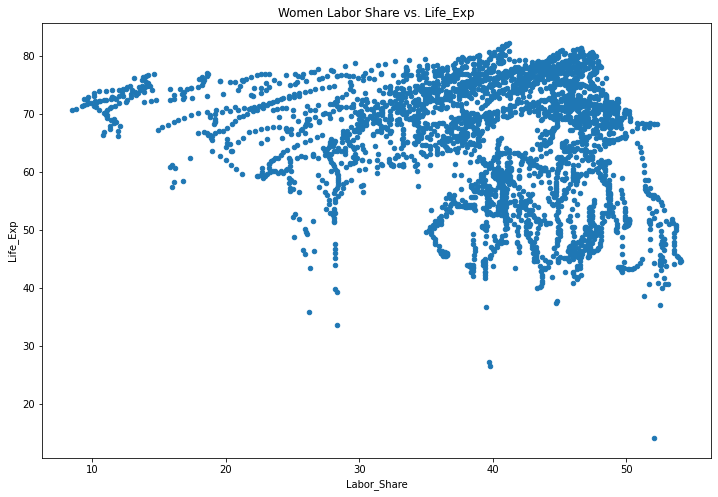

In [155]:
women_life.plot(kind = 'scatter', x = 'Labor_Share', y = 'Life_Exp', figsize = (12,8))
plt.title('Women Labor Share vs. Life_Exp');

In [156]:
women_gdp = pd.merge(women_labor, gdp, on=['Country','Year'], how='inner')
women_gdp.head()

,Country,Year,Labor_Share,GDP
0,Afghanistan,2006,29.4,1315.789117
1,Afghanistan,2005,29.0,1286.793659
2,Afghanistan,2004,28.8,1200.278013
3,Afghanistan,2003,28.8,1235.810063
4,Afghanistan,2002,28.6,1189.784668


In [157]:
women_gdp_cont = pd.merge(women_gdp, continents, on=['Country'], how='inner')
women_gdp_cont.head()

,Country,Year,Labor_Share,GDP,Continent
0,Afghanistan,2006,29.4,1315.789117,Asia
1,Afghanistan,2005,29.0,1286.793659,Asia
2,Afghanistan,2004,28.8,1200.278013,Asia
3,Afghanistan,2003,28.8,1235.810063,Asia
4,Afghanistan,2002,28.6,1189.784668,Asia


In [158]:
women_gdp_cont.nlargest(5,'Labor_Share')

,Country,Year,Labor_Share,GDP,Continent
1544,Mozambique,1991,54.1,481.896856,Africa
1543,Mozambique,1992,54.0,436.720371,Africa
1545,Mozambique,1990,54.0,471.325103,Africa
1542,Mozambique,1993,53.9,464.018358,Africa
1541,Mozambique,1994,53.8,475.249723,Africa


In [181]:
women_gdp_euro = women_gdp_cont[women_gdp_cont['Continent']=='Europe']
women_gdp_euro.head()

,Country,Year,Labor_Share,GDP,Continent
5,Albania,2006,42.0,8568.561885,Europe
6,Albania,2005,42.0,8040.092779,Europe
7,Albania,2004,42.0,7580.138864,Europe
8,Albania,2003,42.0,7154.005545,Europe
9,Albania,2002,42.0,6753.890769,Europe


In [182]:
women_gdp_euro[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.000000,-0.267996
GDP,-0.267996,1.000000


In [190]:
western_euro = ['Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland']
western_euro = women_gdp_euro.query("Country in @western_euro")
western_euro.head(5)

,Country,Year,Labor_Share,GDP,Continent
107,Austria,2006,44.9,50840.694462,Europe
108,Austria,2005,44.6,49387.027864,Europe
109,Austria,2004,44.3,48633.271816,Europe
110,Austria,2003,44.0,47633.114001,Europe
111,Austria,2002,43.9,47419.278412,Europe


In [192]:
country = ['Luxembourg']
lux = women_gdp_euro.query("Country in @country")
lux.head()

,Country,Year,Labor_Share,GDP,Continent
1330,Luxembourg,2006,42.4,113346.035782,Europe
1331,Luxembourg,2005,42.0,108632.360016,Europe
1332,Luxembourg,2004,41.6,107634.837198,Europe
1333,Luxembourg,2003,41.5,104743.000088,Europe
1334,Luxembourg,2002,40.0,103317.331098,Europe


In [193]:
lux[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.00000,0.97617
GDP,0.97617,1.00000


In [195]:
country = ['Norway']
norway = women_gdp_euro.query("Country in @country")
norway[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.000000,0.973127
GDP,0.973127,1.000000


In [196]:
country = ['United Kingdom']
uk = women_gdp_euro.query("Country in @country")
uk[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.000000,0.967879
GDP,0.967879,1.000000


In [197]:
country = ['Finland']
fin = women_gdp_euro.query("Country in @country")
fin[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.000000,0.910393
GDP,0.910393,1.000000


In [199]:
country = ['Singapore']
sing = women_gdp.query("Country in @country")
sing[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.000000,0.774655
GDP,0.774655,1.000000


In [194]:
western_euro[['Labor_Share', 'GDP']].corr()

<>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-194-0ca47dd6e40f>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  western_euro['Country'['Labor_Share', 'GDP']].corr()


TypeError: string indices must be integers

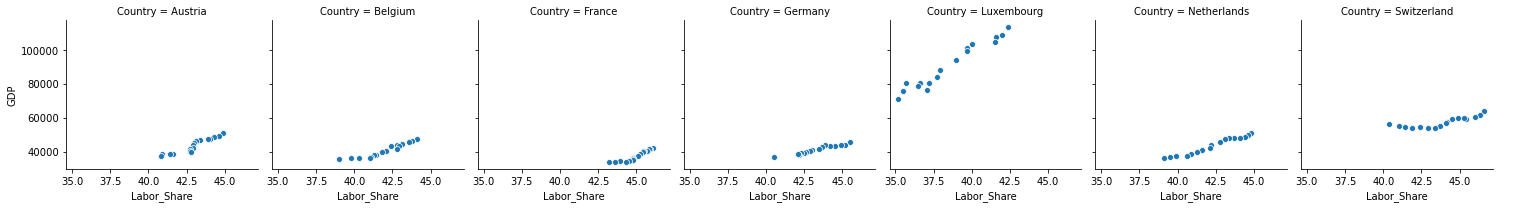

In [186]:
a = sns.FacetGrid(western_euro, col='Country')
a.map(sns.scatterplot,'Labor_Share','GDP')
#a.set(xticks=[2004, 2009, 2014])
a.add_legend();

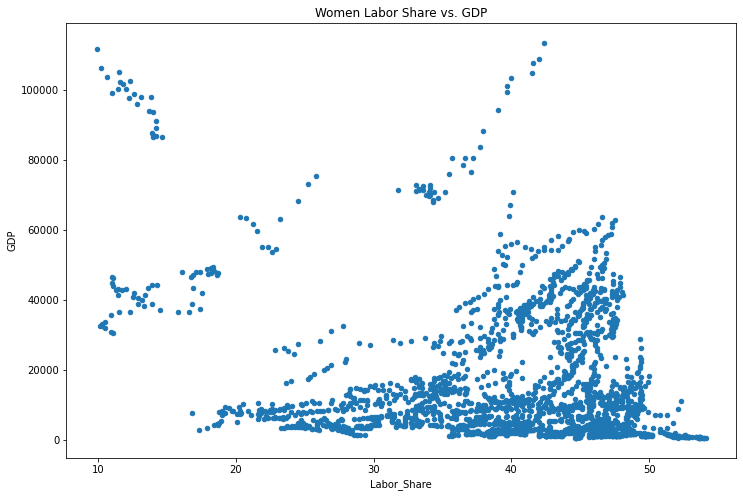

In [159]:
women_gdp.plot(kind = 'scatter', x = 'Labor_Share', y = 'GDP', figsize = (12,8))
plt.title('Women Labor Share vs. GDP');

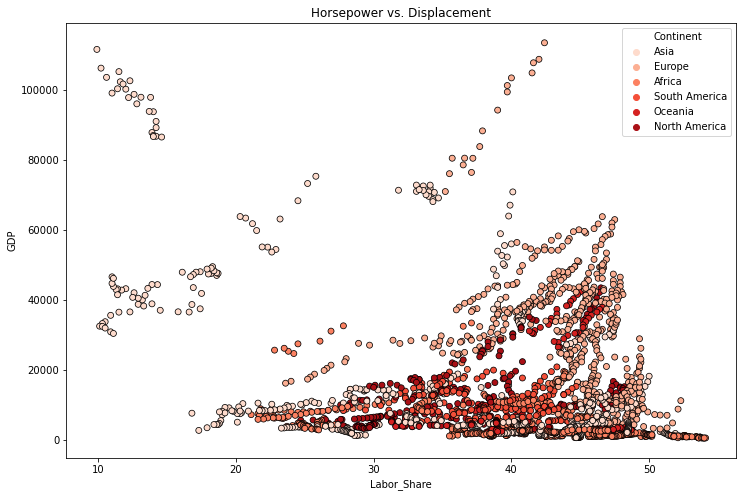

In [160]:
plt.figure(figsize = (12,8))

sns.scatterplot(data = women_gdp_cont, x = 'Labor_Share', y = 'GDP',
                hue = 'Continent', palette = 'Reds', edgecolor = 'black'
               )
plt.title('Horsepower vs. Displacement');

In [161]:
women_gdp[['Labor_Share', 'GDP']].corr()

,Labor_Share,GDP
Labor_Share,1.000000,-0.224964
GDP,-0.224964,1.000000


In [162]:
women_parl = pd.read_csv('../data/women_parl.csv')
women_parl.head(1)

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female,2007.0,IPU_Women in National Parliaments_Sep2007,Percent,23.0,1.0


In [163]:
women_parl.drop(columns=['Subgroup','Source','Unit','Value Footnotes'], axis = 1, inplace=True)
women_parl.rename(columns={'Country or Area': "Country",'Value':'Percent_Parliament'}, inplace=True)
women_parl.head()

,Country,Year,Percent_Parliament
0,Afghanistan,2007.0,23.0
1,Afghanistan,2006.0,23.0
2,Algeria,2007.0,3.0
3,Algeria,2006.0,3.0
4,Algeria,2005.0,3.0


In [164]:
women_parl['Year'] = women_parl['Year'].astype(str).apply(lambda x: x.replace('.0',''))

In [165]:
parl_life = pd.merge(women_parl, life_exp_melt, on=['Country','Year'], how='inner')
parl_life.head()

,Country,Year,Percent_Parliament,Life_Exp
0,Afghanistan,2007,23.0,59.111
1,Afghanistan,2006,23.0,58.684
2,Algeria,2007,3.0,72.602
3,Algeria,2006,3.0,72.334
4,Algeria,2005,3.0,72.061


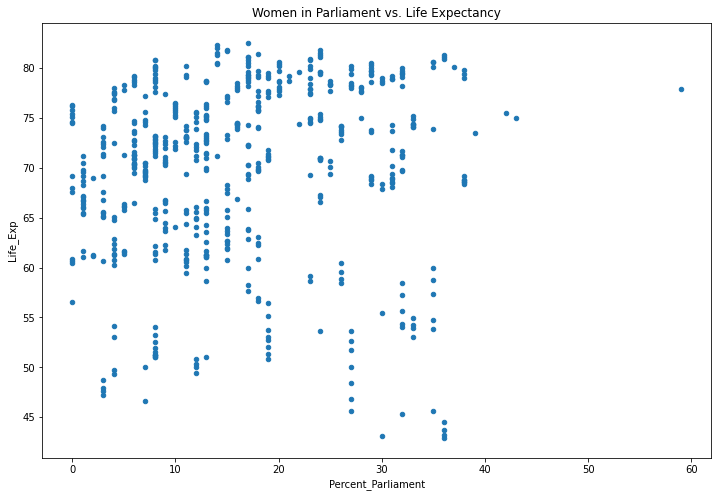

In [166]:
parl_life.plot(kind = 'scatter', x = 'Percent_Parliament', y = 'Life_Exp', figsize = (12,8))
plt.title('Women in Parliament vs. Life Expectancy');

In [167]:
parl_GDP = pd.merge(women_parl, gdp, on=['Country','Year'], how='inner')
parl_GDP.head()

,Country,Year,Percent_Parliament,GDP
0,Afghanistan,2007,23.0,1460.825751
1,Afghanistan,2006,23.0,1315.789117
2,Algeria,2007,3.0,10717.770837
3,Algeria,2006,3.0,10527.408693
4,Algeria,2005,3.0,10504.845111


In [177]:
parl_GDP_2010 = parl_GDP[parl_GDP['Year'] == '2006']
parl_GDP_2010.head()

,Country,Year,Percent_Parliament,GDP
1,Afghanistan,2006,23.0,1315.789117
3,Algeria,2006,3.0,10527.408693
13,Antigua and Barbuda,2006,18.0,21849.221756
23,Argentina,2006,42.0,20777.652710
34,Australia,2006,36.0,42738.465787


In [178]:
parl_GDP_2010[['Percent_Parliament', 'GDP']].corr()

,Percent_Parliament,GDP
Percent_Parliament,1.00000,0.20208
GDP,0.20208,1.00000


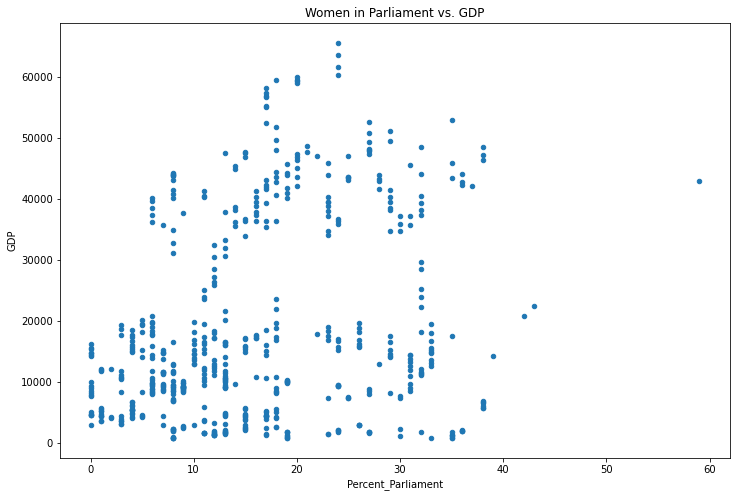

In [133]:
parl_GDP.plot(kind = 'scatter', x = 'Percent_Parliament', y = 'GDP', figsize = (12,8))
plt.title('Women in Parliament vs. GDP');

In [136]:
parl_GDP[['Percent_Parliament', 'GDP']].corr()

,Percent_Parliament,GDP
Percent_Parliament,1.000000,0.278462
GDP,0.278462,1.000000


In [77]:
time_bus = pd.read_csv('../data/time_business.csv')
time_bus.drop(columns=['Value Footnotes'], axis = 1, inplace=True)
time_bus.rename(columns={'Country or Area': "Country",'Value':'Time_Start_Business'}, inplace=True)
time_bus.head(1)

,Country,Year,Time_Start_Business
0,Afghanistan,2019,8.5


In [79]:
time_bus.dtypes

Country                 object
Year                     int64
Time_Start_Business    float64
dtype: object

In [80]:
time_bus['Year'] = time_bus['Year'].astype(str)

In [81]:
time_GDP = pd.merge(time_bus, gdp, on=['Country','Year'], how='inner')
time_GDP.head()

,Country,Year,Time_Start_Business,GDP
0,Afghanistan,2019,8.5,2065.036235
1,Afghanistan,2018,8.5,2033.804389
2,Afghanistan,2017,8.5,2058.400221
3,Afghanistan,2016,8.5,2057.067978
4,Afghanistan,2015,8.5,2068.265904


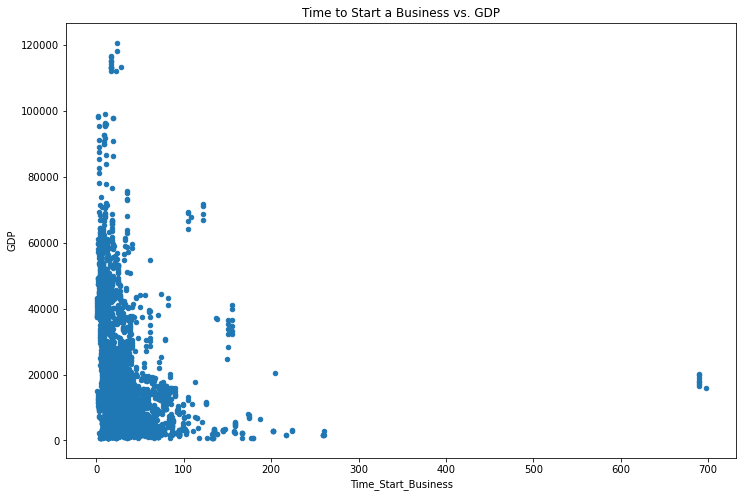

In [134]:
time_GDP.plot(kind = 'scatter', x = 'Time_Start_Business', y = 'GDP', figsize = (12,8))
plt.title('Time to Start a Business vs. GDP');

In [135]:
time_GDP[['Time_Start_Business', 'GDP']].corr()

,Time_Start_Business,GDP
Time_Start_Business,1.000000,-0.184546
GDP,-0.184546,1.000000


In [101]:
infant_mort = pd.read_csv('../data/infant_mort.csv')
infant_mort.drop(columns=['Variant'], axis = 1, inplace=True)
infant_mort.rename(columns={'Country or Area': 'Country','Value':'Infant_Mortality','Year(s)': 'Year'}, inplace=True)
infant_mort.head(1)

,Country,Year,Infant_Mortality
0,Afghanistan,2101,NaN


In [103]:
infant_mort['Year'] = infant_mort['Year'].astype(str)

In [104]:
women_infant = pd.merge(women_parl, infant_mort, on=['Country','Year'], how='inner')
women_infant.head()

,Country,Year,Percent_Parliament,Infant_Mortality
0,Afghanistan,2007,23.0,71.9388
1,Afghanistan,2006,23.0,74.8511
2,Algeria,2007,3.0,25.6436
3,Algeria,2006,3.0,26.6736
4,Algeria,2005,3.0,27.8046


In [105]:
women_infant[['Percent_Parliament', 'Infant_Mortality']].corr()

,Percent_Parliament,Infant_Mortality
Percent_Parliament,1.000000,-0.149996
Infant_Mortality,-0.149996,1.000000


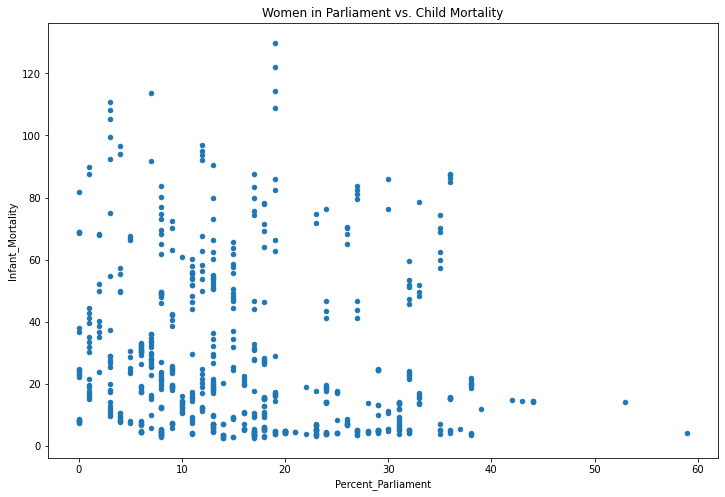

In [107]:
women_infant.plot(kind = 'scatter', x = 'Percent_Parliament', y = 'Infant_Mortality', figsize = (12,8))
plt.title('Women in Parliament vs. Child Mortality');

In [180]:
second_ed = pd.read_csv('../data/second_ed.csv')
second_ed.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,Female,Not applicable,Percent,35.23734
1,Afghanistan,2014,Male,Not applicable,Percent,61.51051
2,Afghanistan,2014,All genders,Not applicable,Percent,48.75032
3,Afghanistan,2013,All genders,Not applicable,Percent,48.87529
4,Afghanistan,2013,Male,Not applicable,Percent,62.10465
